# Convolutinal Neural Network for Classifying Cars

### Background
Stanford AI has developed a dataset of cars with make, model and year. The aim of this project is to classify cars as accurately as possible using a convolutional neural network. We will use the Keras package with Tensorflow backend to run model training, and we will validate and evaluate the accuracy of the model based on the parameters.

### Contents
1. Build the classifier layers
2. Load training and test data
3. Run training
4. Evaluate model accuracy

#### Load packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Model A: Classifying Make and Model
<b>Aim</b>: Classify a car as part of the 196 classes in our dataset in terms of both make and model year. 

## 1. Build the Classifier

We will use 3 convolution layers for the sake of computing power, with all layers using the relu activation function. We use this function because of it's non-linear (compared to sigmoid, for example, which can cause neurons to 'vanish'). 

In [2]:
# config
img_pixels = 300
n_filters = 35
layer_nodes = 400
batchsize = 100
epochs = 50
steps_per_epoch = 100
validation_steps = 50

In [3]:
car_classifier = Sequential()
#Adding 1st Convolution and Pooling Layer
car_classifier.add(Conv2D(n_filters,kernel_size=(3,3),input_shape=(img_pixels,img_pixels,3),activation='relu'))
car_classifier.add(MaxPool2D(pool_size=(2,2)))
car_classifier.add(Dropout(0.2))
#Adding 2nd Convolution and Pooling Layer
car_classifier.add(Conv2D(n_filters,kernel_size=(3,3),activation='relu'))
car_classifier.add(MaxPool2D(pool_size=(2,2)))
car_classifier.add(Dropout(0.2))
#Adding 3rd Convolution and Pooling Layer
car_classifier.add(Conv2D(n_filters,kernel_size=(3,3),activation='relu'))
car_classifier.add(MaxPool2D(pool_size=(2,2)))
car_classifier.add(Dropout(0.2))
#Adding 4th Convolution and Pooling Layer
car_classifier.add(Conv2D(n_filters,kernel_size=(3,3),activation='relu'))
car_classifier.add(MaxPool2D(pool_size=(2,2)))
car_classifier.add(Dropout(0.2))
#Adding 5th Convolution and Pooling Layer
car_classifier.add(Conv2D(n_filters,kernel_size=(3,3),activation='relu'))
car_classifier.add(MaxPool2D(pool_size=(2,2)))
car_classifier.add(Dropout(0.2))

#Flatten
car_classifier.add(Flatten())

#Adding Input and Output Layer
car_classifier.add(Dense(units=layer_nodes,activation='relu'))
car_classifier.add(Dense(units=layer_nodes,activation='relu'))
car_classifier.add(Dense(units=layer_nodes,activation='relu'))
car_classifier.add(Dense(units=196,activation='softmax'))

car_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0708 19:26:44.134262 11560 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 19:26:44.167186 11560 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 19:26:44.172182 11560 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 19:26:44.209186 11560 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_b

In [4]:
#Data agumentation
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('../car_data/train',
                                              target_size=(img_pixels,img_pixels),
                                              batch_size=batchsize,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory('../car_data/test',
                                              target_size=(img_pixels,img_pixels),
                                              batch_size=batchsize,
                                              class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8040 images belonging to 196 classes.


In [ ]:
history = car_classifier.fit_generator(train_data,
                                       steps_per_epoch=steps_per_epoch,
                                       epochs=epochs,
                                       validation_data=test_data,
                                       validation_steps=validation_steps)

In [ ]:
vals = pd.DataFrame.from_dict(history.history)
vals = pd.concat([pd.Series(range(0,30),name='epochs'),vals],axis=1)
vals.tail()

#### Saving model to disk

In [ ]:
import json

# serialize model to JSON
model_json = car_classifier.to_json()
with open("models/cars_classifier_tuned.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
car_classifier.save_weights("models/cars_classifier_tuned.h5")
print("Saved model to disk")

#### Loading Model from disk

In [2]:
from keras.models import model_from_json

# load json and create model
json_file = open('models/cars_classifier_untuned.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/cars_classifier_untuned.h5")
print("Loaded model from disk")

W0708 18:34:41.569905  6448 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 18:34:41.657921  6448 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 18:34:41.703908  6448 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0708 18:34:41.710176  6448 deprecation_wrapper.py:119] From C:\Users\himi6\AppData\Local\Continuum\anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:131: The

Loaded model from disk


### Test model on a single image

In [3]:
import numpy as np
from keras.preprocessing import image

#### Load image

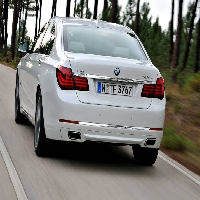

In [6]:
# load image
test_image = image.load_img('car_data/single_prediction/bmw_7series.jpg', target_size=(img_pixels, img_pixels))
test_image

In [7]:
# Convert to array and expand_dims because we are only doing 1 image prediction
test_image_array = image.img_to_array(test_image)
test_image_expand = np.expand_dims(test_image_array, axis=0)

#### Make Prediction

In [8]:
classes = loaded_model.predict(test_image_expand, batch_size=1)

#### List most likely predictions

In [11]:
results = {}
iterator = 0
for key in train_data.class_indices:
    results.setdefault(key, classes[0][iterator])
    iterator+=1

In [12]:
pd.DataFrame.from_dict(results, orient='index').sort_values(0, ascending=False).head(10)

,0
Mitsubishi Lancer Sedan 2012,1.0
AM General Hummer SUV 2000,0.0
HUMMER H2 SUT Crew Cab 2009,0.0
Honda Accord Coupe 2012,0.0
Honda Accord Sedan 2012,0.0
Honda Odyssey Minivan 2007,0.0
Honda Odyssey Minivan 2012,0.0
Hyundai Accent Sedan 2012,0.0
Hyundai Azera Sedan 2012,0.0
Hyundai Elantra Sedan 2007,0.0


## Model B: Classifying Make only

<b>Aim</b>: Preidct the make of a car using the input image (e.g. BMW, Honda, etc).

For this model, we will need to aggregate our existing training and prediction dataset into make ONLY.